In [1]:
import numpy as np
import matplotlib.pyplot as plt
from pace_neutrons import Matlab
m = Matlab()

# Set SpinW to use mex files:
swp = m.swpref()
swp.usemex = 1

Trying MATLAB version: 2022b (/mnt/ceph-training/course_materials/pace_env/lib/python3.11/site-packages/pace_neutrons/ctfs/pace_2022b.ctf))
Searching for Matlab 9.13 in /opt/matlab2021b
Searching for Matlab 9.13 in /opt
Trying MATLAB version: 2021b (/mnt/ceph-training/course_materials/pace_env/lib/python3.11/site-packages/pace_neutrons/ctfs/pace_2021b.ctf))
Searching for Matlab 9.11 in /opt/matlab2021b
Found Matlab 9.11 glnxa64 at /opt/matlab2021b
Interface opened
All features have moved to hor_config


!==================================================================!

All features have moved to hor_config

!==================================================================!
!                           Horace 4.0.0                           !

!                                                                  !
!           R.A. Ewings, A. Buts, M.D. Le, J van Duijn,            !
!                  I. Bustinduy, and T.G. Perring                  !
!                                   

### Excercise 2: Triangular lattice antiferromagnet

Create an empty `spinw` object with, and use the `genlattice` method ([docs](https://spinw.org/spinw_genlattice)) of this object to create a hexagonal lattice with parameters $a=b=3$ Å and $c=5$ Å ($α=β=90˚, γ=120˚$).

Use the `addatom` method ([docs](https://spinw.org/spinw_genlattice)) to add a Ni$^{2+}$ ion with $S=1$ at $r=(0,0,0)$.

Use the `gencoupling` method ([docs](https://spinw.org/spinw_gencoupling)) to generate the bonds up to 5 Å distance.

Use the `addmatrix` method ([docs](https://spinw.org/spinw_addmatrix)) to add an exchange tensor ($3 \times 3$ matrix) representing an antiferromagnetic Heisenberg exchange interaction of magnitude 1 meV, then use the `addcoupling` method ([docs](https://spinw.org/spinw_addmatrix)) to define the first (nearest neighbour bond) using this matrix (tensor).

Plot your model and see that it represents a triangular lattice antiferromagnet (you should be able to click on the atoms and bonds to get information on them).

Use the `genmagstr` method ([docs](https://spinw.org/spinw_genmagstr)) with the `'mode', 'helical'` option, `k=[1/3,1/3,0]`, `S=[[1],[0],[0]]` and `n=[0,0,1]` to create a 120˚ magnetic structure in the incommensurate representation.

Calculate and plot the inelastic neutron spin wave spectrum.

Add an easy-axis anisotropy in the a-b plane (perpendicular to $[0,0,1]$) with magnitude 0.1 meV using the `addmatrix` and `addaniso` methods ([docs](https://spinw.org/addaniso)) and recalculate and re-plot the INS spectrum. What is the difference between this and the previous spectrum you plotted? From this can you infer what fluctuations are associated with the different magnon modes in the spectrum? (How many modes are there in the spectrum?)


Creating the bond list (maxDistance = 5 Å, nCell = 4x3x2)...

...4 bonds are retained out of 175 generated!

Creating 3D plot... 

...3k faces and 2k vertices are drawn!



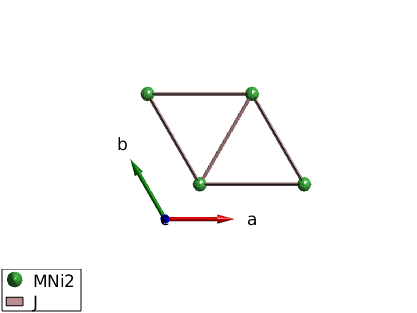

In [2]:
# Set up a triangular lattice AFM
tri = m.spinw()
tri.genlattice('lat_const', [3,3,5], 'angled', [90, 90, 120])
tri.addatom('r', [0,0,0], 'S', 1, 'label', 'MNi2')
tri.gencoupling('maxDistance', 5)
tri.addmatrix('label', 'J', 'value', 1)
tri.addcoupling('mat', 'J', 'bond', 1)
m.plot(tri)

Creating 3D plot... 


...4k faces and 2k vertices are drawn!



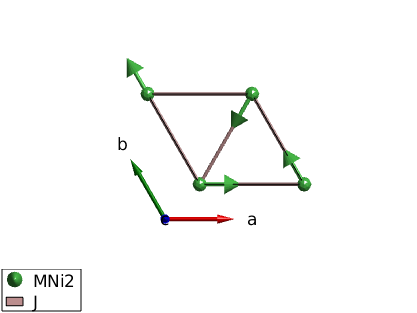

In [3]:
# Generates a 120 deg structure
tri.genmagstr('mode', 'helical', 'k', [1/3,1/3,0], 'S', [[1],[0],[0]], 'n', [0,0,1])
m.plot(tri)

Calculating INCOMMENSURATE spin wave spectra (nMagExt = 1, nHkl = 600, nTwin = 1)...

No magnetic form factor is included in the calculated structure factor.
No g-tensor is included in the calculated structure factor.

                                        

Calculation is finished in 00:00:00 (hh:mm:ss).
Calculation finished.



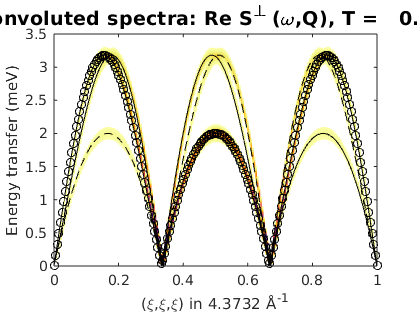

In [4]:
# Plots the spin wave spectrum
#spec = tri.spinwave(([0, 0, 0], [1, 1, 1], 200))
spec = m.spinwave(tri, ([0, 0, 0], [1, 1, 1], 200))
spec = m.sw_egrid(spec)
m.sw_plotspec(spec, 'dE', 0.1, 'legend', 0)

Calculating INCOMMENSURATE spin wave spectra (nMagExt = 1, nHkl = 600, nTwin = 1)...

No magnetic form factor is included in the calculated structure factor.
No g-tensor is included in the calculated structure factor.

Calculation is finished in 00:00:00 (hh:mm:ss).
Calculation finished.



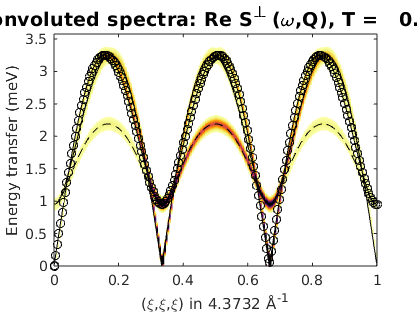

In [5]:
# Add easy-plane SIA and recalculate spectrum
tri.addmatrix('label', 'K', 'value', np.diag([0, 0, 0.1]))
tri.addaniso('K')

spec = tri.spinwave(([0, 0, 0], [1, 1, 1], 200))
spec = m.sw_egrid(spec)
m.sw_plotspec(spec, 'dE', 0.1, 'legend', 0)


Make a copy of `swobj` using the `copy` method ([docs](https://spinw.org/spinw_copy)) (the spinw object you just created – spinw objects are “handle” objects so with `swobj2 = swobj`, `swobj2` is just another handle to the original object – operations on `swobj2` actually operate on the same object as `swobj`. In Horace most objects are “value” objects where the `= (equals) operator creates a new copy). 

Using `genmagstr` on the copied object with the option `'nExt', 0.1` and the same parameters as before, create the same 120˚ magnetic structure but in the super-cell representation instead of the rotating frame (incommensurate) representation. Plot the model to check that it still looks like the 120˚ structure.

Calculate and plot the INS spectrum – what’s the difference with the previous (incommensurate) case? (How many modes are plotted now?) Why is this?


Creating 3D plot... 


...5k faces and 3k vertices are drawn!



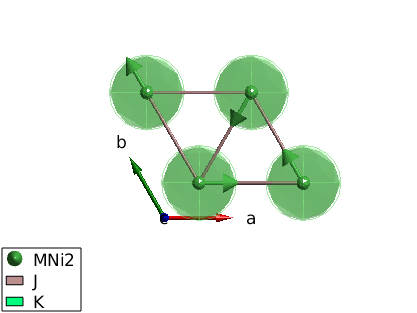

In [6]:
# Make a copy of the spinw object and create a super-cell 120 deg structure
tri2 = m.copy(tri)
tri2.genmagstr('mode', 'helical', 'k', [1/3,1/3,0], 'S', [[1],[0],[0]], 'n', [0,0,1], 'nExt', 0.1)
m.plot(tri2)

Calculating COMMENSURATE spin wave spectra (nMagExt = 9, nHkl = 200, nTwin = 1)...

No magnetic form factor is included in the calculated structure factor.
No g-tensor is included in the calculated structure factor.

                                        

Calculation is finished in 00:00:00 (hh:mm:ss).



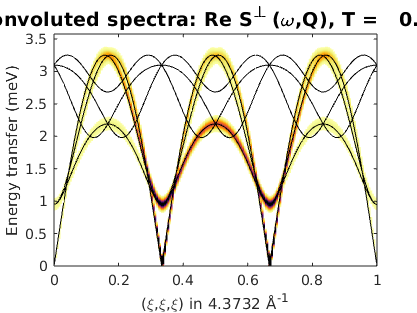

In [7]:
# Recalculate the spin wave dispersion
spec = tri2.spinwave(([0, 0, 0], [1, 1, 1], 200))
spec = m.sw_egrid(spec)
m.sw_plotspec(spec, 'dE', 0.1, 'legend', 0)


Add an easy-axis anisotropy along the $a$ axis with magnitude +1 meV. Recalculate the INS spectrum – you should get an error message. Why does this occur?

Creating 3D plot... 


...5k faces and 3k vertices are drawn!



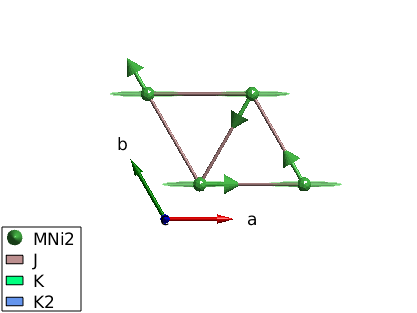

In [8]:
# Add an easy-axis SIA
tri2 = m.copy(tri)
tri2.genmagstr('mode', 'helical', 'k', [1/3, 1/3, 0], 'S', [[1],[0],[0]], 'n', [0,0,1], 'nExt', 0.1)
tri2.addmatrix('label', 'K2', 'value', np.diag([-1, 0, 0]))
tri2.addaniso('K2')
m.plot(tri2)

# Next line will error
#spec = tri2.spinwave(([0, 0, 0], [1, 1, 1], 200))

Use the `'hermit', false` option to spinwave to force the calculation and plot the result using `sw_plotspec` ([docs](https://spinw.org/sw_plotspec)) with the `'imag', true` option to plot the energies of the imaginary modes.

What’s the maximum energy of imaginary modes? 

If the maximum energy of the imaginary mode is small (~0.01-0.02 [a few percent] of the maximum energy of all the modes) then you can ignore the warning and the calculate spectrum is probably accurate enough. But if it is much larger then you should not trust the calculation.

Calculating COMMENSURATE spin wave spectra (nMagExt = 9, nHkl = 200, nTwin = 1)...

No magnetic form factor is included in the calculated structure factor.

                                        

Calculation is finished in 00:00:00 (hh:mm:ss).
Calculation finished.



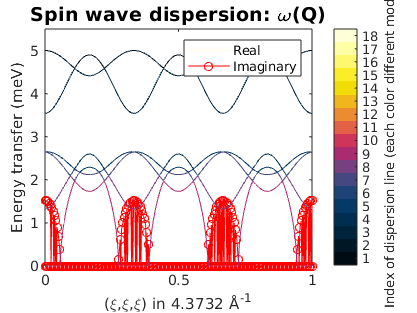

In [10]:
# Recalculate the spectrum
spec = tri2.spinwave(([0, 0, 0], [1, 1, 1], 200), 'hermit', False, 'sortMode', False)
m.sw_plotspec(spec, 'imag', True)

Use the `optmagsteep` method ([docs](https://spinw.org/spinw_optmagsteep)) to refine the magnetic structure, and recalculate and replot the INS spectrum.

Are the imaginary modes still there? What are the main differences you see now, compared to previously? Can you explain what the modes are now?

Optimising the magnetic structure using local spin updates
(nRun = 100, boundary = (per,per,per))...

                                        

  1.00%, remained: 000:00:01 (HH:MM:SS).

  2.00%, remained: 000:00:01 (HH:MM:SS).

  3.00%, remained: 000:00:01 (HH:MM:SS).

  4.00%, remained: 000:00:00 (HH:MM:SS).

  5.00%, remained: 000:00:00 (HH:MM:SS).

  6.00%, remained: 000:00:00 (HH:MM:SS).

  7.00%, remained: 000:00:00 (HH:MM:SS).

  8.00%, remained: 000:00:00 (HH:MM:SS).

  9.00%, remained: 000:00:00 (HH:MM:SS).

 10.00%, remained: 000:00:00 (HH:MM:SS).

 11.00%, remained: 000:00:00 (HH:MM:SS).

 12.00%, remained: 000:00:00 (HH:MM:SS).

 13.00%, remained: 000:00:00 (HH:MM:SS).

 14.00%, remained: 000:00:00 (HH:MM:SS).

 15.00%, remained: 000:00:00 (HH:MM:SS).

 16.00%, remained: 000:00:00 (HH:MM:SS).

 17.00%, remained: 000:00:00 (HH:MM:SS).

 18.00%, remained: 000:00:00 (HH:MM:SS).

 19.00%, remained: 000:00:00 (HH:MM:SS).

 20.00%, remained: 000:00:00 (HH:MM:SS

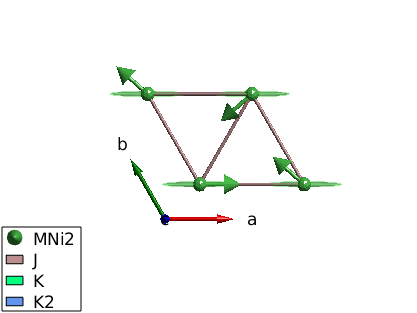

In [11]:
tri2.optmagsteep()
m.plot(tri2)

Calculating COMMENSURATE spin wave spectra (nMagExt = 9, nHkl = 200, nTwin = 1)...

                                        

Calculation is finished in 00:00:00 (hh:mm:ss).
Calculation finished.



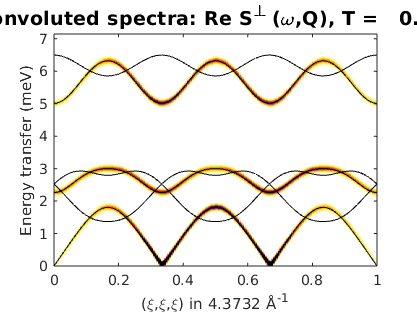

In [12]:
spec = tri2.spinwave(([0, 0, 0], [1, 1, 1], 200), 'hermit', False, 'sortMode', False)
#m.sw_plotspec(spec, 'imag', True)
spec = m.sw_egrid(spec)
m.sw_plotspec(spec, 'dE', 0.1, 'legend', 0)

### Excercise 3: BiFeO$_3$

In this exercise we’re going to look at BiFeO3 a distorted G-type (cubic) antiferromagnet, which has a long period (small k) cycloid magnetic structure as the result of the Dzyaloshinskii-Moriya interaction. The spin Hamiltonian and INS data is described in this paper: 

Magnetic Dispersion and Anisotropy in Multiferroic BiFeO3,
M. Matsuda et al., Phys. Rev. Lett. 109 067205 (2012)

https://web.ornl.gov/~okapon/manybodytheory/publication/pdf/PhysRevLett_109_067205.pdf

Crystal structure is imported from /mnt/ceph/auxiliary/pace/edatc/matlab_scripts/BiFeO3.cif.

Creating 3D plot... 


...8k faces and 4k vertices are drawn!



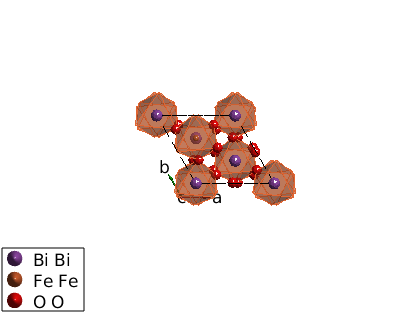

In [13]:
# The aim of this tutorial is to calculate the propagation vector
# of the cycloid of the multiferroic compound BiFeO3.
#
# BiFeO3 is a famous room-temperature multiferroic. It is a slightly
# distorted perovskite structure. Its magnetic structure is a very
# long period cycloid which is stabilised by a Dzyaloshinskii-Moriya
# interaction. In the absence of the DM interaction, it would have
# a simple G-type AFM structure.
#
# We will apply the DM interaction and use SpinW to calculate the
# propagation vector k of the cycloid, using optmagk.

# First we load the structure from CIF and plot the Fe-O octahedra
bfo = m.spinw('/mnt/ceph/auxiliary/pace/edatc/matlab_scripts/BiFeO3.cif')
m.plot(bfo, 'range', [1, 1, 1])
m.swplot.plotchem('atom1', 'Fe Fe', 'atom2', 'O O', 'limit', 6);

In [14]:
# Prints out the unit cell to check what the labels are:
print(bfo.unit_cell)

Matlab struct with fields:
    r: [[0.     0.     0.473 ]
 [0.     0.     0.012 ]
 [0.     0.2212 0.9543]]
    S: [[0. 0. 0.]]
    label: ['Bi Bi', 'Fe Fe', 'O O']
    color: [[158 224 255]
 [ 79 102  13]
 [181  51  13]]
    ox: [[0. 0. 0.]]
    occ: [[1. 1. 1.]]
    b: [[8.532 9.45  5.803]
 [1.    1.    1.   ]]
    ff: [[[ 0.0000000e+00  0.0000000e+00  0.0000000e+00]
  [ 0.0000000e+00  0.0000000e+00  0.0000000e+00]
  [ 0.0000000e+00  0.0000000e+00  0.0000000e+00]
  [ 0.0000000e+00  0.0000000e+00  0.0000000e+00]
  [ 0.0000000e+00  0.0000000e+00  0.0000000e+00]
  [ 0.0000000e+00  0.0000000e+00  0.0000000e+00]
  [ 0.0000000e+00  0.0000000e+00  0.0000000e+00]
  [ 0.0000000e+00  0.0000000e+00  0.0000000e+00]
  [ 0.0000000e+00  0.0000000e+00  0.0000000e+00]
  [ 0.0000000e+00  0.0000000e+00  0.0000000e+00]
  [ 1.0000000e+00  1.0000000e+00  1.0000000e+00]]

 [[ 1.6282274e+01  1.2311098e+01  2.9604270e+00]
  [ 1.0118000e-01  5.0094150e+00  1.4182259e+01]
  [ 3.2725136e+01  1.8766230e+00  2.508

1. Use `gencoupling`, `addmatrix` and `addcoupling` to define the nearest (J1=4.5 meV) and next nearest (J2=0.2 meV) neighbour couplings.

   Note that the PRL paper uses the measured moment at 200K for the spin magnitude S value (4.1uB) which is a factor of 1.44 smaller than the theoretical spin moment used here (S=5/2) thus the exchange parameters should be scaled down by this amount as noted on page 4 of the PRL.
   
   Plot the structure again and check it looks like fig 1 of the PRL.

Creating the bond list (maxDistance = 
...1542 bonds are retained out of 17820 generated!

Creating 3D plot... 


...10k faces and 5k vertices are drawn!



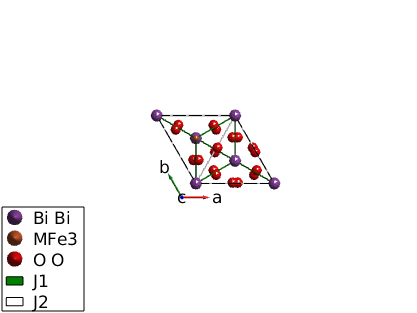

In [15]:
#%
# SpinW is not able to infer which atom is magnetic so we manually specify
# here that the second atom is Fe3+ (changing its label to match the SpinW
# form factor library name)
bfo.unit_cell.S[1] = 2.5  # Note Python uses 0-based indexing, this is the second element
bfo.unit_cell.label[1] = 'MFe3'

# The PRL paper (and most spin wave models of BiFeO3) considers two
# exchange interactions, a DM interaction and an axial single-ion
# anisotropy. We will use the parameters in the PRL paper.


J1 = 4.5;  # == 6.48 / 1.44
J2 = 0.2;  # == 0.29 / 1.44
D = 0.1623;
K = -0.0068; # negative to indicate axial SIA rather than planar

bfo.gencoupling('maxDistance', 20)
bfo.addmatrix('label', 'J1', 'value', J1, 'color', 'green')
bfo.addmatrix('label', 'J2', 'value', J2, 'color', 'white')
bfo.addcoupling('mat', 'J1', 'bond', 1)
bfo.addcoupling('mat', 'J2', 'bond', 2)

# Plots the unit cell - check it resembles fig 1 of paper
m.plot(bfo)

2. Use `addmatrix` to define a DM interaction (read its help text) and the use `addcoupling` to add an addition nearest neighbour DM interaction. Use the same magnitude DM as in the paper (`D=0.1623 meV`).
  
   The DM vector is along `[1, -1, 0]` in the hexagonal unit cell we are using, and connects atoms along the spiral direction `[1 1 0]` (e.g. 2nd neighbours). This is equivalent to the psuedo-cubic `[1,1,-2]` direction which the PRL paper uses (in the cubic cell the sprial is along `[1, -1, 0]`). The principal axes in the two cells are: `[1 1 0]hex = [1 -1 0]pc`, and `[0 0 1]hex = [1 1 1]pc`.

   Note SpinW can accommodate up to three difference exchange tensors per bond; the limit of 3 is just a hard-coded limit to save memory and can be extended (reprogrammed) if there is demand.

In [16]:
# Now we add the DM term. SpinW has a short cut where if you give it
# a 3-vector, it would interpret this as a DM vector and construct the
# correct 3x3 exchange tensor.
bfo.addmatrix('label', 'D', 'value', np.array([1, -1, 0])*D, 'color', [255, 225, 175])
bfo.addcoupling('mat', 'D', 'bond', 2)

# Print the exchange tensor for the DM interaction
#id = find(~cellfun(@isempty, m.strfind(bfo.matrix.label, 'D')));
id = [idx for idx,lb in enumerate(bfo.matrix.label) if 'D' in lb]
print(np.squeeze(bfo.matrix.mat[:,:,id]))

[[ 0.      0.      0.1623]
 [-0.      0.      0.1623]
 [-0.1623 -0.1623  0.    ]]


3. Use addmatrix and addaniso to add an easy-axis anisotropy along the (hexagonal) c axis of magnitude `K=0.0068 meV` (remember the SpinW convention of negative values for easy-axis and positive values for easy-plane anisotropy).

In [17]:
# Finally add the single-ion anisotropy
bfo.addmatrix('label', 'K', 'value', np.diag([0, 0, K]), 'color', [185, 135, 0])
bfo.addaniso('K')

array([], shape=(0, 0), dtype=float64)

4. Use `optmagk` to optimise the incommensurate propagation vector k, both using the `'kbase'` option (the propogation vector is expected to be along `[1;1;0]`). Run the calculations a few times and compare the ground state energy E of the different approaches as well as the inferred k vector. What do you notice?

In [18]:
# Now optimise the propagation vector.
# We know that it should be qm = [delta delta 0] so we give optmagk
# a helping hand by setting this as a basis vector
res = bfo.optmagk('kbase', [[1], [1], [0]])
print(res['k'])
print(bfo.energy())

[[0.99635842]
 [0.99635842]
 [0.        ]]


[[-80.66552447]]


You should find `k = [0.0036 0.0036 0]` or `[0.9964 0.9964 0]` because there is no energetic difference between `k` and `1-k`. However, `delta=0.0036` is quite different from `delta=0.0045` that we were expecting.

This is because the propogation vector determined by SpinW here assumes a “harmonic” cycloid – that is that the ordered structure can be described by a single phase term `S_i = S0.exp(ik.r_i)`. 

In BiFeO3 when the SIA is included, the cycloid structure is no longer harmonic, but instead acquires additional modulations because the spins prefer to align along the easy-axis direction and so “bunches” up at those points such that `S_i = S0.exp(i phi_i)` where
`phi_i = k.r_i + psi_i`, and `psi_i` is proportional to `sin(2k.r_i)`.Given then, what value of D should you choose to get the experimental propagation vector?

5. What happens if we don't set the basis vector as `[1; 1; 0]`?

What about the energy of this ground state compared to the one with `kbase=[1;1;0]`?


In [19]:
res = bfo.optmagk() #without giving 'kbase' option
print(res['k'])
print(bfo.energy())

[[5.16087010e-03]
 [9.92969208e-01]
 [7.16077384e-07]]

[[-80.66552673]]


The algorithm sometimes gets stuck in local minima where the propagation vector is not along `[1 1 0]` – but the ground state energy of these configurations are always higher than that with the propagation vector along `[1 1 0]`. Using the `'kbase'` option forces the algorithm to always choose vectors along `[1 1 0]` and hence avoid the local minima.

6. We can adjust `D` to get a modulation vector closer to `delta=0.0045`.

   Including the effects of the anharmonicity is not possible in SpinW, except through the use of a large supercell (as in the Matsuda paper). The computational cost, for BiFeO3 is prohibitive due to the long wavelength of the cycloid (the calculations in the Matsuda paper used an optimised code on a cluster).

   Calculations with SpinW are thus restricted to the `K=0` limit. Using figure 5 of the PRL paper, looking at the point where `K=0` (e.g. for zero single-ion anisotropy and hence having a harmonic cycloid) the paper suggests that a value of `D=0.185` should be used. 

[[0.9958474]
 [0.9958474]
 [0.       ]]
Creating 3D plot... 


...13k faces and 7k vertices are drawn!



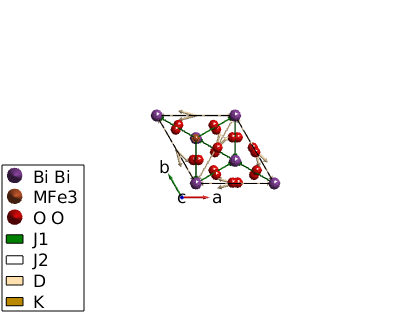

In [20]:
J1 = 4.5;  # == 6.48 / 1.44
J2 = 0.2;  # == 0.29 / 1.44
D = 0.185;
K = 0;

# Substitute in new parameter values
bfo.matparser('mat', ('J1', 'J2', 'K(3,3)'), 'param', [J1, J2, K]);
# For the DM vector we have to put in the matrix explicitly
dmmat = [[0, 0, 1], [0, 0, 1], [-1, -1, 0]];
bfo.matparser('mat', ('D',), 'selector', dmmat, 'param', [D,]);

# Optimise the propagation vector again
res = bfo.optmagk('kbase', [[1], [1], [0]])
print(res['k'])

m.plot(bfo)

7. Calculate the spin wave dispersion around the propagation vector from the (111) Bragg peak with the `'hermit', false` option and see where the imaginary eigenvalues are (you will have to zoom in to below 2meV).


Calculating INCOMMENSURATE spin wave spectra (nMagExt = 6, nHkl = 600, nTwin = 1)...

No magnetic form factor is included in the calculated structure factor.
No g-tensor is included in the calculated structure factor.
                                        

Calculation is finished in 00:00:00 (hh:mm:ss).
Calculation finished.



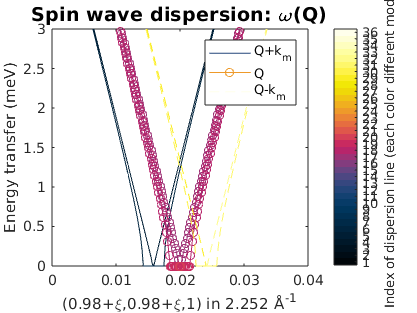

In [21]:
spec = bfo.spinwave(([0.98, 0.98, 1], [1.02, 1.02, 1], 200), 'hermit', False)
m.sw_plotspec(spec)
m.ylim([0, 3])

You should see some imaginary modes – `optmagk` produces a cycloid but left the initial magnetic structure as moments parallel to the c axis. In addition to creating the cycloid, however, the DM interaction induces a very small canting which is not initially satisfied leaving a small non-hermicity.

This canting is probably not physical but just a result of the calculation – it is like relaxing a crystal structure in a DFT phonon calculation; the relaxed structure will not be exactly like the experimental structure but you should still used the relaxed structure because it agrees better with the calculated forces (for DFT phonon calculations) or exchanges (for spin wave calculations). This is because your calculations may not include all the necessary interactions to reproduce the full experimental observations. 

8. Run `optmagsteep` you should see this small canting and the imaginary modes go away. 

Initial magnetic structure

[[ 0.  -0.   0.  -0.   0.  -0. ]
 [ 0.  -0.   0.  -0.   0.  -0. ]
 [-2.5  2.5 -2.5  2.5 -2.5  2.5]]
Optimising the magnetic structure using local spin updates
(nRun = 100, boundary = (per,per,per))...


                                        

  1.00%, remained: 000:00:00 (HH:MM:SS).

  2.00%, remained: 000:00:00 (HH:MM:SS).
Calculation is finished in 00:00:00 (hh:mm:ss).

Magnetic structure after optmagsteep
[[ 0.03 -0.03  0.   -0.    0.   -0.  ]
 [ 0.06 -0.06  0.   -0.    0.   -0.  ]
 [-2.5   2.5  -2.5   2.5  -2.5   2.5 ]]
Calculating INCOMMENSURATE spin wave spectra (nMagExt = 6, nHkl = 600, nTwin = 1)...

Calculation is finished in 00:00:00 (hh:mm:ss).
Calculation finished.



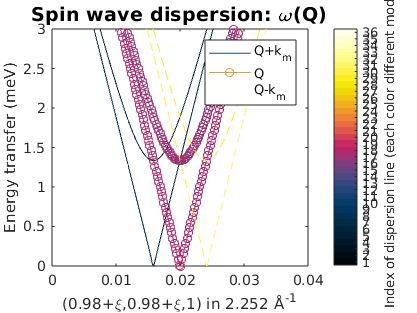

In [22]:
print("Initial magnetic structure")
print(np.round(bfo.magstr()['S'],2))

bfo.optmagsteep()

print("Magnetic structure after optmagsteep")
print(np.round(bfo.magstr()['S'],2))

# Now plot the spin wave dispersion again. Verify the imaginary
# energies are gone.
spec = bfo.spinwave(([0.98, 0.98, 1], [1.02, 1.02, 1], 200), 'hermit', False)
m.sw_plotspec(spec)
m.ylim([0, 3])